In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Читаем данные из таблицы

In [4]:
students_train = pd.read_csv('D:/datasets/train.csv', sep = ',')
students_questions = pd.read_csv('D:/datasets/questions.csv', sep = ',')
students_lectures = pd.read_csv('D:/datasets/lectures.csv', sep = ',')

Проверяем наличие пропусков в строках таблиц

In [ ]:
print(students_train.isna().sum())
print(students_questions.isna().sum())
print(students_lectures.isna().sum())

Информация о правильных ответах. Гистограмма визуализирует среднее количество правильных ответов среди студентов.

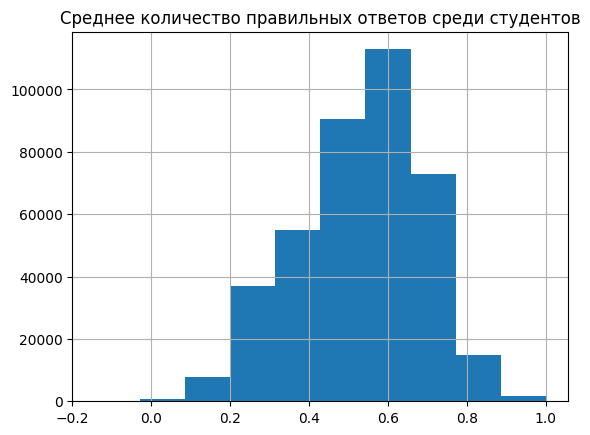

In [5]:
plt.figure()
students_train.groupby('user_id')['answered_correctly'].mean().hist()
plt.title('Среднее количество правильных ответов среди студентов')
students_train.groupby('content_id')['answered_correctly'].mean().sort_values()
plt.show()

Информация о среднем времени ответа на вопрос.  

In [ ]:
plt.figure()
students_train.groupby('user_id')['prior_question_had_explanation'].mean().hist()
plt.title('Использование объяснений среди студентов')

plt.figure()
students_train.groupby('content_id')['prior_question_elapsed_time'].mean().hist()
plt.title('Среднее время ответа на вопрос')
plt.show()

Средний результат ответа студентов на вопросы с объяснением.

In [ ]:
no_explanation = students_train[students_train['prior_question_had_explanation'] == False]
accuracy_no_explanation = no_explanation.groupby('user_id')['answered_correctly'].mean()
print(f"Средний процент правильных ответов: {accuracy_no_explanation.mean()}")

Среднйи результат ответов студентов которые посещали и не посещали лекции.

In [7]:
attended_lectures = students_train[students_train['content_type_id'] == 1]
no_lectures = students_train[students_train['content_type_id'] == 0]
lecture_accuracy = attended_lectures.groupby('user_id')['answered_correctly'].mean()
no_lecture_accuracy = no_lectures.groupby('user_id')['answered_correctly'].mean()

print(f"Средний результат ответов студентов, которые посещали лекции: {lecture_accuracy}, которые не посещали лекции {no_lecture_accuracy}")

Средний результат ответов студентов, которые посещали лекции: -149606.0, которые не посещали лекции 214614.66554385494


Среднее время ответа по результату.

In [ ]:
correct_time = students_train[students_train['answered_correctly'] == 1]['prior_question_elapsed_time'].mean()
incorrect_time = students_train[students_train['answered_correctly'] == 0]['prior_question_elapsed_time'].mean()

print(f"Среднее время ответа для правильных ответов: {correct_time}. Для неправильных: {incorrect_time}")

Точность ответов в зависимости от сложности вопросов

In [ ]:
plt.figure()
merged_data = pd.merge(students_train, students_questions, left_on='content_id', right_on='question_id')
merged_data.groupby('difficulty')['answered_correctly'].mean().plot(kind='bar')
plt.show()